In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns
from datetime import datetime

theses_v2 = pd.read_csv("PhD_v2.csv", sep=',',low_memory=False)

In [2]:
# ajout de colonnes numero de jour, numero de mois, mois et année de soutenance
theses_v2 ['annee_soutenance']=pd.to_datetime(theses_v2['Date de soutenance'], format='%d-%m-%y').dt.strftime('%Y')
theses_v2 ['mois_soutenance']=pd.to_datetime(theses_v2['Date de soutenance'], format='%d-%m-%y').dt.strftime('%B')
theses_v2 ['no_mois']=pd.to_datetime(theses_v2['Date de soutenance'], format='%d-%m-%y').dt.strftime('%m')
theses_v2 ['no_jour']=pd.to_datetime(theses_v2['Date de soutenance'], format='%d-%m-%y').dt.strftime('%d')

In [15]:
#Convertir les année, numeros de mois et de jour en numériques
theses_v2[['annee_soutenance','no_mois','no_jour']] = theses_v2[['annee_soutenance','no_mois','no_jour']].apply(pd.to_numeric)
theses_v2.head()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,annee_soutenance,mois_soutenance,no_mois,no_jour
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,...,NaN,NaN,s69480,non,26-01-12,26-01-12,NaN,NaN,NaN,NaN
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,...,NaN,NaN,s98826,non,22-11-13,22-11-13,NaN,NaN,NaN,NaN
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,1993.0,January,1.0,1.0
3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,enCours,...,NaN,NaN,s88867,non,12-07-13,12-01-16,NaN,NaN,NaN,NaN
4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,enCours,...,NaN,NaN,s89663,non,13-07-13,12-07-13,NaN,NaN,NaN,NaN


In [16]:
year14_month_day=theses_v2.loc[ (theses_v2['annee_soutenance'] > 2004)& (theses_v2['annee_soutenance'] <2019 ), ['annee_soutenance','no_mois','no_jour' ]]
print( year14_month_day )

        annee_soutenance  no_mois  no_jour
5                 2008.0     11.0     24.0
6                 2005.0      7.0      1.0
7                 2009.0     12.0      8.0
8                 2013.0      1.0     10.0
9                 2011.0      6.0     24.0
...                  ...      ...      ...
447596            2018.0     11.0      6.0
447597            2015.0      3.0     11.0
447612            2018.0     12.0     19.0
447622            2018.0     12.0      7.0
447628            2018.0     11.0     30.0

[175718 rows x 3 columns]


        annee_soutenance  no_mois  no_jour
79                2015.0      1.0      1.0
134               2015.0      1.0      1.0
615               2012.0      1.0      1.0
629               2014.0      1.0      1.0
844               2012.0      1.0      1.0
...                  ...      ...      ...
447269            2006.0      1.0      1.0
447281            2008.0      1.0      1.0
447321            2006.0      1.0      1.0
447327            2006.0      1.0      1.0
447375            2008.0      1.0      1.0

[77810 rows x 3 columns]
    annee_soutenance  Sum_1_1
0             2005.0    10522
1             2006.0    10885
2             2007.0    11349
3             2008.0    10686
4             2009.0     9554
5             2010.0     8190
6             2011.0     5605
7             2012.0     4398
8             2013.0     3237
9             2014.0     1666
10            2015.0     1069
11            2016.0      633
12            2017.0       15
13            2018.0        1
[0.99621

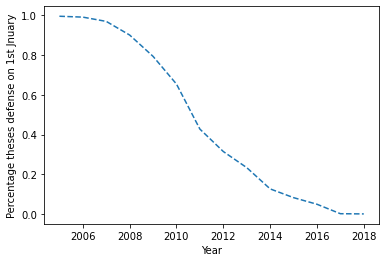

In [17]:
these_1_1=year14_month_day.loc[( (year14_month_day['no_mois']==1) & (year14_month_day['no_jour']==1) ),:].copy()
print(these_1_1)

evo_year_1_1=these_1_1.groupby('annee_soutenance')['no_jour'].count().reset_index().copy()
evo_year_1_1.columns=['annee_soutenance','Sum_1_1']
print(evo_year_1_1 )


year14_month_day_all=year14_month_day.copy()
year14_month_day_all=year14_month_day_all.groupby(['annee_soutenance'])['no_mois'].count().reset_index()
year14_month_day_all.columns=['annee_soutenance','YearSum']

Sumtotal=[]
Sumtotal=list( year14_month_day_all['YearSum'].astype(int))
Jan_1_1=list( evo_year_1_1['Sum_1_1'].astype(int))
 
Evo_perc_1_1 = [i / j for i, j in zip(Jan_1_1, Sumtotal)]
print( Evo_perc_1_1 )
import matplotlib.pyplot as plt
import matplotlib
plt.plot( range(2005,2019,1), Evo_perc_1_1 , linestyle='--' )
plt.xlabel('Year')
plt.ylabel('Percentage theses defense on 1st Jnuary')
plt.show()

MultiIndex([('no_jour',  1.0),
            ('no_jour',  2.0),
            ('no_jour',  3.0),
            ('no_jour',  4.0),
            ('no_jour',  5.0),
            ('no_jour',  6.0),
            ('no_jour',  7.0),
            ('no_jour',  8.0),
            ('no_jour',  9.0),
            ('no_jour', 10.0),
            ('no_jour', 11.0),
            ('no_jour', 12.0)],
           names=[None, 'no_mois'])
                 no_jour                                                    \
no_mois             1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0   
annee_soutenance                                                             
2005.0                 1    1    3    1    2    3    4    0    0    7    8   
2006.0                 1    1    0    0    3    4    1    3    5   28   18   
2007.0                 7   10    7    8    3   30   11    0   32   61   84   
2008.0                35   43   52   26   37   88   56    4   65  156  256   
2009.0                93   73   99   65   91 

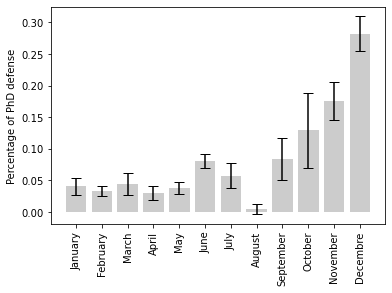

In [18]:
indexes = year14_month_day[ (year14_month_day['no_mois']==1) & (year14_month_day['no_jour']==1) ].index
month_soutien_year_no11=pd.DataFrame()
month_soutien_year_no11=year14_month_day.copy()
month_soutien_year_no11.drop(indexes,inplace = True)

####
#month_soutien_year_no11=year14_month_day.loc[~((year14_month_day['month de soutenance']==1) & (year14_month_day['jour_de_soutenance']==1)),:].copy()

pivotTableno11=pd.pivot_table(month_soutien_year_no11,index='annee_soutenance',columns='no_mois', aggfunc=len, fill_value=0)
print(pivotTableno11.columns)
print(pivotTableno11.head())
pivotTableno11['sum']= pivotTableno11.sum(axis=1)
print( pivotTableno11['sum'] )

print(pivotTableno11.loc[:, 'no_jour'])

pivotTable_percenno11=pivotTableno11.loc[:,'no_jour'].div(pivotTableno11['sum'], axis=0)
print(pivotTable_percenno11.head())
print(type( pivotTable_percenno11 ))
print('=============')
print( pivotTable_percenno11.mean() )
print('=============')
print( pivotTable_percenno11.std() )
x=range(1,13)
fig, ax1 = plt.subplots()
ax1.bar(x,pivotTable_percenno11.mean(),yerr=pivotTable_percenno11.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
#ax2.bar(x,pivotTable_percen.std()/pivotTable_percen.mean(),align='center', alpha=0.2, ecolor='black', capsize=5) 
plt.ylabel('Percentage of PhD defense')
#plt.xlabel('Month')
#Year14_per.set(xticks=x)
#Year14_per.set_xticklabels(np.x)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')
plt.savefig('EvoDefPerc_Month_2005_2018.png')
plt.show()

In [6]:
year14_month_day.head()

,annee_soutenance,no_mois,no_jour
5,2008.0,11.0,24.0
6,2005.0,7.0,1.0
7,2009.0,12.0,8.0
8,2013.0,1.0,10.0
9,2011.0,6.0,24.0


MultiIndex([('no_jour',  1.0),
            ('no_jour',  2.0),
            ('no_jour',  3.0),
            ('no_jour',  4.0),
            ('no_jour',  5.0),
            ('no_jour',  6.0),
            ('no_jour',  7.0),
            ('no_jour',  8.0),
            ('no_jour',  9.0),
            ('no_jour', 10.0),
            ('no_jour', 11.0),
            ('no_jour', 12.0)],
           names=[None, 'no_mois'])
                 no_jour                                                    \
no_mois             1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0   
annee_soutenance                                                             
2005.0             10523    1    3    1    2    3    4    0    0    7    8   
2006.0             10886    1    0    0    3    4    1    3    5   28   18   
2007.0             11356   10    7    8    3   30   11    0   32   61   84   
2008.0             10721   43   52   26   37   88   56    4   65  156  256   
2009.0              9647   73   99   65   91 

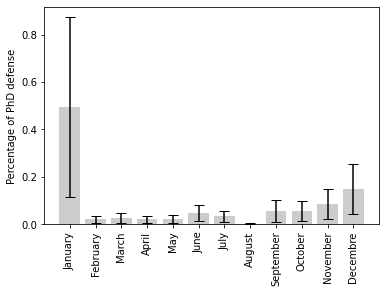

In [19]:
pivotTable=pd.pivot_table(year14_month_day,index='annee_soutenance',columns='no_mois', aggfunc=len, fill_value=0)
print(pivotTable.columns)
print("=======================")
print(pivotTable.head())
pivotTable['sum']= pivotTable.sum(axis=1)
#print( pivotTable['sum'] )
 
#print(pivotTable.loc[:, 'no_jour'])
pivotTable_percen=pivotTable.loc[:,'no_jour'].div(pivotTable['sum'], axis=0)
print(pivotTable_percen.head())
#print('=============')
print( pivotTable_percen.mean() )
print('=============')
print( pivotTable_percen.std() )
x=range(1,13)
fig, ax1 = plt.subplots()
ax1.bar(x,pivotTable_percen.mean(),yerr=pivotTable_percen.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
#ax2.bar(x,pivotTable_percen.std()/pivotTable_percen.mean(),align='center', alpha=0.2, ecolor='black', capsize=5) 
plt.ylabel('Percentage of PhD defense')
#plt.xlabel('Month')
#Year14_per.set(xticks=x)
#Year14_per.set_xticklabels(np.x)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')
plt.savefig('EvoDefPerc_Month_2005_2018.png')
plt.show()

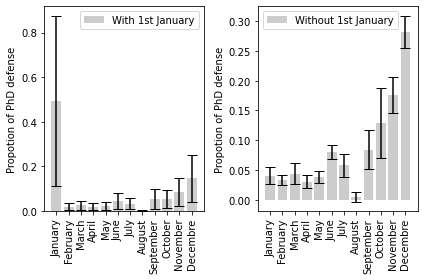

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2)
plt.sca(ax1)
ax1.bar(x,pivotTable_percen.mean(),yerr=pivotTable_percen.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
plt.ylabel('Propotion of PhD defense')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')

plt.sca(ax2)
ax2.bar(x,pivotTable_percenno11.mean(),yerr=pivotTable_percenno11.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
plt.ylabel('Propotion of PhD defense')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')

fig.tight_layout()
ax1.legend(["With 1st January"])
ax2.legend( ["Without 1st January"])
plt.show()
fig.savefig('Compare__Jan_2005_2018.png', dpi=200) 